# Data Frames in Python

<style> p { text-align: justify; } </style>

A data frame is a two-dimensional, size-mutable, and heterogeneous data structure. Think of it as a table or spreadsheet where rows represent records and columns represent variables or attributes. In Python, the `pandas.DataFrame` class is used to represent data frames.

Key characteristics of data frames:

- Columns can contain different data types (e.g., numeric, character, factor).
- Rows represent individual observations or cases.
- Data frames can hold large datasets efficiently.

## Creating Data Frames

A data frame can be created from various data types:

In [3]:
import pandas as pd

# Creating a data from a dictionary

data = {
    "Name": ["Amrit", "Ishwor", "Indra", "Rakshya"],
    "Age": [27, 24, 21, 25],
    "Grade": ["A", "B", "A", "B"],
    "Major": ["Maths", "Science", "Maths", "Science"]
}

df = pd.DataFrame(data)

# Display the data frame
print(df)

      Name  Age Grade    Major
0    Amrit   27     A    Maths
1   Ishwor   24     B  Science
2    Indra   21     A    Maths
3  Rakshya   25     B  Science


## Accessing and Modifying Data

**Selecting Rows and Columns**

We can access elements of a data frame using indexing, column names, or logical conditions.

In [4]:
# Access a column
print(df["Name"])

0      Amrit
1     Ishwor
2      Indra
3    Rakshya
Name: Name, dtype: object


In [5]:
# Access a row by index
print(df.loc[0])

Name     Amrit
Age         27
Grade        A
Major    Maths
Name: 0, dtype: object


In [11]:
# Access a specific value
value = df.at[2, "Name"]  # Using label-based indexing
print(value)

Indra


In [12]:
# Using position-based indexing
value = df.iloc[2, 0]  
print(value)

Indra


**Adding and Removing Columns**

We can add a new column to a data frame dynamically or remove an existing column.

In [13]:
# Add a column 'Pass' where students with Grade 'A' are True
df["Pass"] = df["Grade"] == "A"
print(df)

      Name  Age Grade    Major   Pass
0    Amrit   27     A    Maths   True
1   Ishwor   24     B  Science  False
2    Indra   21     A    Maths   True
3  Rakshya   25     B  Science  False


In [14]:
# Remove the 'Grade' column
df = df.drop(columns=["Grade"])
print(df)

      Name  Age    Major   Pass
0    Amrit   27    Maths   True
1   Ishwor   24  Science  False
2    Indra   21    Maths   True
3  Rakshya   25  Science  False


## Data Frame Operations

**Filtering and Subsetting**

We can filter rows based on conditions using logical operators.

In [15]:
# Filter rows where Age > 22
filtered_df = df[df["Age"] > 22]
print(filtered_df)

      Name  Age    Major   Pass
0    Amrit   27    Maths   True
1   Ishwor   24  Science  False
3  Rakshya   25  Science  False


**Sorting and Reordering**

Sorting a data frame is straightforward with the `sort_values()` method.

In [16]:
# Sort by the 'Age' column in ascending order
df_sorted = df.sort_values(by="Age", ascending=True)
print(df_sorted)

      Name  Age    Major   Pass
2    Indra   21    Maths   True
1   Ishwor   24  Science  False
3  Rakshya   25  Science  False
0    Amrit   27    Maths   True


**Summary and Statistical Functions**

The `.describe()` method in pandas provides a summary of each column in a DataFrame. Here's how:

In [18]:
# Summary of the DataFrame (Descriptive statistics)
print(df.describe())

         Age
count   4.00
mean   24.25
std     2.50
min    21.00
25%    23.25
50%    24.50
75%    25.50
max    27.00


In [19]:
# Get number of rows and columns
num_rows, num_cols = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 4
Number of columns: 4


**Aggregation and Grouping**

The `groupby` method in pandas along with aggregation functions enable aggregation and grouping.

In [20]:
# Group by 'Major' and calculate the average age
grouped_df = df.groupby("Major").agg(Average_Age=("Age", "mean")).reset_index()

print(grouped_df)

     Major  Average_Age
0    Maths         24.0
1  Science         24.5


- `groupby` groups the data frame by the 'Major' column
- `agg` applies the mean function to the 'Age' column and renames the result to 'Average_Age'
- `reset_index()` resets the index so the grouped column "Major" becomes a regular column in the resulting data frame.

So far, this chapter has introduced you to the versatility and power of data frames in Python, laying the foundation for data manipulation and analysis. Now, we will delve into data frames specifically designed for geospatial data.

## Geospatial Data Frames

A Geospatial Data Frame (GeoDataFrame) extends a standard data frame by incorporating a geometry column that holds spatial data, such as points, lines, and polygons. This combination of spatial and attribute data makes geospatial data frames particularly useful for spatial analysis and mapping.

In Python, the `GeoPandas` library is often used to handle geospatial data frames, providing easy-to-use structures for working with vector data and offering compatibility with other libraries for geospatial and statistical analysis.

The geometry is a key component of geospatial data frames, defining the spatial features for each observation. Each row represents a spatial feature linked to its attributes, and the geometry column typically stores spatial data in formats such as GeoJSON, WKT (Well-Known Text), or binary formats like WKB (Well-Known Binary).

### Creating GDF

You can create a geospatial data frame using `GeoPandas`. Here’s an example:

In [21]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Create a data frame with spatial data
data = {
    "Name": ["Point A", "Point B", "Point C"],
    "Latitude": [27.7, 28.2, 26.9],
    "Longitude": [85.3, 84.9, 83.8]
}

df = pd.DataFrame(data)

# Convert to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
geo_data = gpd.GeoDataFrame(df, geometry=geometry)

# Set the coordinate reference system (CRS) to WGS 84
geo_data.set_crs(epsg=4326, inplace=True)

# Print the GeoDataFrame
print(geo_data)

      Name  Latitude  Longitude           geometry
0  Point A      27.7       85.3  POINT (85.3 27.7)
1  Point B      28.2       84.9  POINT (84.9 28.2)
2  Point C      26.9       83.8  POINT (83.8 26.9)


### Manipulating GDF

**Spatial Queries**

Geospatial data frames support operations like spatial filtering and proximity analysis.

In [22]:
from shapely.geometry import box

# Define a bounding box and convert it to a geometry object
bbox = box(84, 27, 86, 29)  # xmin, ymin, xmax, ymax
bbox_polygon = gpd.GeoSeries([bbox], crs="EPSG:4326")

# Filter points within the bounding box
filtered_data = geo_data[geo_data.geometry.within(bbox_polygon.iloc[0])]

# Print filtered data
print(filtered_data)

      Name  Latitude  Longitude           geometry
0  Point A      27.7       85.3  POINT (85.3 27.7)
1  Point B      28.2       84.9  POINT (84.9 28.2)


**Attribute-Based Operations**

Just like standard data frames, we can manipulate attributes in geospatial data frames.

In [23]:
# Add a new column for Elevation
geo_data['Elevation'] = [1500, 2000, 1700]

# Print the updated GeoDataFrame
print(geo_data)

      Name  Latitude  Longitude           geometry  Elevation
0  Point A      27.7       85.3  POINT (85.3 27.7)       1500
1  Point B      28.2       84.9  POINT (84.9 28.2)       2000
2  Point C      26.9       83.8  POINT (83.8 26.9)       1700


### Visualization of GDF

Geospatial data frames can be visualized using the `matplotlib` library.

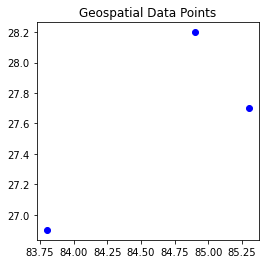

In [24]:
import matplotlib.pyplot as plt

# Plot the GeoDataFrame
geo_data.plot(marker='o', color='blue', legend=True)
plt.title("Geospatial Data Points")
plt.show()

Geospatial data frames bridge the gap between tabular data and spatial analysis, making them indispensable for modern geospatial workflows. Their versatility, combined with Python’s ecosystem of geospatial libraries, provides an efficient and intuitive way to analyze and visualize spatial data.

## Vector GeoDataFrame

In Python, the `GeoDataFrame` from the `GeoPandas` library is used to represent vector-based spatial data. A GeoDataFrame combines both *spatial* and *tabular* data, making it ideal for spatial analysis and data manipulation. It is essentially a data frame with a special geometry column that contains spatial data, such as points, lines, and polygons.

With a GeoDataFrame, you can perform typical data manipulation tasks, such as filtering, summarizing, and joining, on the tabular data. At the same time, it allows for spatial operations like plotting, spatial indexing, and spatial joins. The **tabular** portion of a GeoDataFrame allows you to perform standard data frame operations (like groupby, sort, merge), while the geometry column enables you to carry out spatial analysis and visualization.

This section will focus on working with geospatial data, such as the vector data for the Kanchanpur district in Nepal, available in GeoPackage (.gpkg) format. You can download this data, load it using GeoPandas, and perform both spatial and tabular operations. The GeoDataFrame provides a powerful tool for handling, analyzing, and visualizing geographic data, seamlessly integrating both spatial and non-spatial aspects of analysis.

### Structure

The vector GeoDataFrame contains both the geometry column and attribute data.

In [26]:
import geopandas as gpd

# Import the GeoDataFrame
vector_data = gpd.read_file("data/vector/kanchanpur.gpkg")

# View the structure of the GeoDataFrame
print(vector_data.info())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   NAME      21 non-null     object  
 1   geometry  21 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 464.0+ bytes
None


In [27]:
# Display the first few rows
print(vector_data.head())

           NAME                                           geometry
0  BaisiBichawa  MULTIPOLYGON (((80.49934 28.64667, 80.49709 28...
1      Beldandi  MULTIPOLYGON (((80.25229 28.75782, 80.25377 28...
2      Chandani  MULTIPOLYGON (((80.10973 28.98432, 80.10986 28...
3        Daijee  MULTIPOLYGON (((80.34424 29.05416, 80.34449 29...
4   Dekhatbhuli  MULTIPOLYGON (((80.44701 28.78921, 80.43608 28...


### Adding New Columns

In Python, you can add a new column to a GeoDataFrame in a similar way you would add it to a regular DataFrame using `pandas`.

In [28]:
# Add a new column - Population
vector_data['Population'] = [
    37900, 46565, 72813, 49223, 52221, 64436, 40823,
    97216, 36368, 277108, 51835, 38199, 46773, 44571,
    48838, 11581, 131, 19211, 56755, 58257, 37573
]

# Display the updated GeoDataFrame
print(vector_data.head())

           NAME                                           geometry  Population
0  BaisiBichawa  MULTIPOLYGON (((80.49934 28.64667, 80.49709 28...       37900
1      Beldandi  MULTIPOLYGON (((80.25229 28.75782, 80.25377 28...       46565
2      Chandani  MULTIPOLYGON (((80.10973 28.98432, 80.10986 28...       72813
3        Daijee  MULTIPOLYGON (((80.34424 29.05416, 80.34449 29...       49223
4   Dekhatbhuli  MULTIPOLYGON (((80.44701 28.78921, 80.43608 28...       52221


### Arithmetic Computation

In Python, you can calculate the area of each geometry in a `GeoDataFrame` and create a new column for population density as follows:

In [31]:
# Reproject vector data to a projected CRS (e.g., UTM zone 45N for this area)
vector_data = vector_data.to_crs(epsg=32645)

# Calculate the area of each district (in square meters)
vector_data['area_m2'] = vector_data.geometry.area

# Convert the area from square meters to square kilometers
vector_data['area_km2'] = vector_data['area_m2'] / 1e6

# Add a new column with density (population/area)
vector_data['Density'] = vector_data['Population'] / vector_data['area_km2']

# Display the updated GeoDataFrame
print(vector_data[['NAME', 'Population', 'area_km2', 'Density']].head())

           NAME  Population    area_km2      Density
0  BaisiBichawa       37900   74.476642   508.884384
1      Beldandi       46565   24.906232  1869.612393
2      Chandani       72813   32.517201  2239.214842
3        Daijee       49223  102.823123   478.715280
4   Dekhatbhuli       52221   91.109522   573.167312


### Selecting and Filtering

You can filter the data using `GeoDataFrame` from `geopandas`. Here's how you can select specific columns and display the first few rows:

In [32]:
# Select specific columns (e.g., "NAME" and "Population")
selected_data = vector_data[['NAME', 'Population']]

# Display the first few rows
print(selected_data.head())

           NAME  Population
0  BaisiBichawa       37900
1      Beldandi       46565
2      Chandani       72813
3        Daijee       49223
4   Dekhatbhuli       52221


In [37]:
# Filter rows where Population is greater than 60,000
filtered_data = vector_data[vector_data['Population'] > 60000]

# Display the filtered data (similar to tibble in R)
print(filtered_data[['NAME', 'Population', 'Density', 'area_km2']])

       NAME  Population      Density   area_km2
2  Chandani       72813  2239.214842  32.517201
5   Dodhara       64436  2591.163947  24.867589
7    Kalika       97216  3789.177761  25.656226
9  Laxmipur      277108  9518.765708  29.111758


### Grouping and Summarizing

Grouping and summarizing operations are common in data analysis. You can group data based on an attribute and calculate summary statistics for each group.

In [42]:
# Group by 'NAME' and calculate the total population and average density
region_summary = vector_data.groupby('NAME').agg(
    total_population=('Population', 'sum'),
    average_density=('Density', 'mean')
).reset_index()

# Display the result
print(region_summary)

                  NAME  total_population  average_density
0         BaisiBichawa             37900       508.884384
1             Beldandi             46565      1869.612393
2             Chandani             72813      2239.214842
3               Daijee             49223       478.715280
4          Dekhatbhuli             52221       573.167312
5              Dodhara             64436      2591.163947
6              Jhalari             40823       332.137920
7               Kalika             97216      3789.177761
8           Krishnapur             36368       218.213683
9             Laxmipur            277108      9518.765708
10   MahendranagarN.P.             51835       299.845566
11             Parasan             38199      1004.067157
12            Pipaladi             46773      1087.800781
13     RaikawarBichawa             44571       545.906632
14      RampurBilaspur             48838      1236.669117
15      RauteliBichawa             11581       382.064494
16  Royal Shuk

- `groupby('NAME')`: Groups the GeoDataFrame by the NAME column, which represents different villages in Kanchanpur district.
- `agg()`: Used to specify the aggregation functions. Here, it calculates the sum of `Population` and the mean of `Density`.
- `reset_index()`: Resets the index after the grouping operation to make sure the resulting `DataFrame` is formatted properly.

### Pivoting and Reshaping

In Python, you can achieve pivoting and reshaping using pandas.

In [47]:
# Drop geometry column and pivot data into long format
long_format = vector_data.drop(columns='geometry') \
                         .melt(id_vars=["NAME"], value_vars=["Population", "Density"], 
                               var_name="attribute", value_name="value")

# Display the first and middle few rows of the reshaped DataFrame
print(long_format.iloc[[0,1,2,21,22,23], :])

            NAME   attribute         value
0   BaisiBichawa  Population  37900.000000
1       Beldandi  Population  46565.000000
2       Chandani  Population  72813.000000
21  BaisiBichawa     Density    508.884384
22      Beldandi     Density   1869.612393
23      Chandani     Density   2239.214842


- `drop(columns='geometry')`: This removes the geometry column since it’s not needed for reshaping the tabular data.
- `melt()`: This function is used to pivot data from wide to long format.

### Visualization

To plot the population density from a GeoDataFrame using `matplotlib` and `geopandas`, you can do the following:

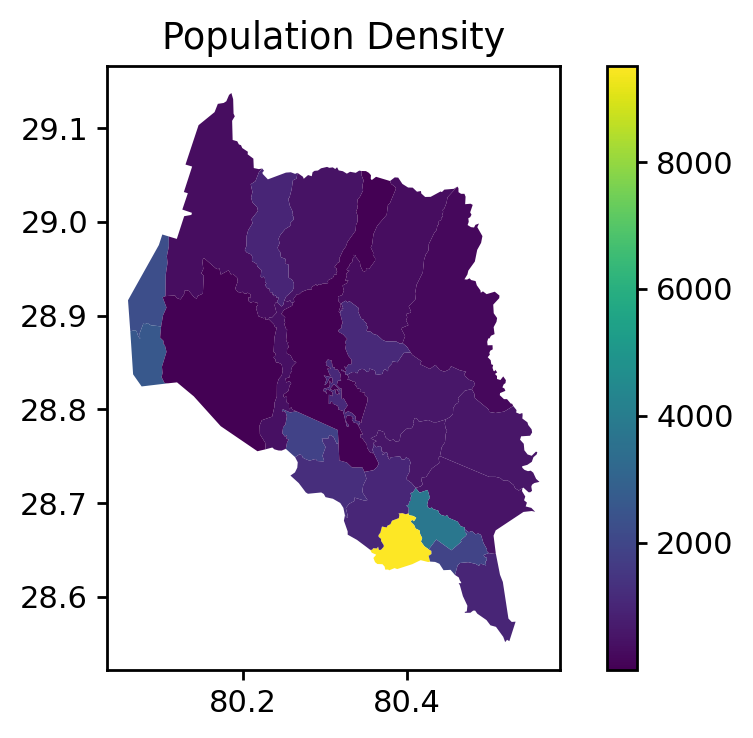

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Reproject vector data to a projected CRS (e.g., UTM zone 45N for this area)
vector_data = vector_data.to_crs(epsg=4326)

# Plot the Population Density
vector_data.plot(column='Density', cmap='viridis', legend=True)
plt.title("Population Density")
plt.show()


## Raster GeoDataFrame

A Raster GeoDataFrame extends the concept of a standard GeoDataFrame to represent raster data in a `tabular` format, integrating spatial information with associated metadata. While raster data is inherently grid-based, a Raster GeoDataFrame provides a structured way to store additional attributes, such as statistics, classification information, or metadata, alongside spatial references. This format is particularly useful for working with tiled or multi-resolution raster datasets, enabling seamless integration with vector data workflows. By combining the tabular nature of data frames with the grid structure of raster data, it facilitates efficient querying, visualization, and analysis of geospatial raster datasets.

### Creating a Raster Data

The python uses `numpy` to create random raster data and `matplotlib` to visualize it. The `rasterio` package is included to define the raster's metadata and coordinate reference, though it isn’t required for basic visualization. If you'd like, this data can be saved to a file using rasterio.

Creating a raster dataset with random values and plotting it:

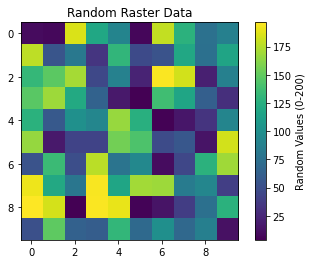

In [1]:
import numpy as np
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Create a raster-like array with random values
rows, cols = 10, 10
raster_data = np.random.uniform(0, 200, (rows, cols))

# Define metadata for the raster
transform = rasterio.transform.from_origin(west=0, north=10, xsize=1, ysize=1)  # Example transform
meta = {
    'driver': 'GTiff',
    'dtype': 'float32',
    'nodata': None,
    'width': cols,
    'height': rows,
    'count': 1,
    'crs': '+proj=latlong',
    'transform': transform
}

# Plot the raster
plt.imshow(raster_data, cmap='viridis')
plt.colorbar(label="Random Values (0-200)")
plt.title("Random Raster Data")
plt.show()

### Coverting Raster to GDF

Here's how you can convert raster data to a DataFrame in Python and view the first few rows/columns:

In [10]:
import pandas as pd
import numpy as np

# Convert the raster array to a DataFrame
df = pd.DataFrame(raster_data)

# Display the first few rows
print(df.iloc[[0, 1, 2, 3], [0, 1, 2, 3]])

            0           1           2           3
0    9.486722    7.970051  185.341034  118.427440
1  177.612209   54.231652   81.056526   33.781664
2  132.081063  147.690934  170.482734   45.649135
3  147.414827  168.349048  121.128104   64.665892


If you'd like to include spatial information (e.g., row and column indices as spatial coordinates), here's how you can do it:

In [11]:
# Add spatial coordinates (row and column indices)
x, y = np.meshgrid(range(cols), range(rows))  # Create grid of coordinates

df_with_coords = pd.DataFrame({
    "x": x.flatten(),
    "y": y.flatten(),
    "value": raster_data.flatten()
})

# Display the first few rows
print(df_with_coords.head())

   x  y       value
0  0  0    9.486722
1  1  0    7.970051
2  2  0  185.341034
3  3  0  118.427440
4  4  0   90.487945


This approach provides both the raster values and their respective spatial coordinates, enabling easier manipulation and analysis of the data.

### Summarize Raster Values

In this subsection, we will load the Population Count raster data for the year 2020.

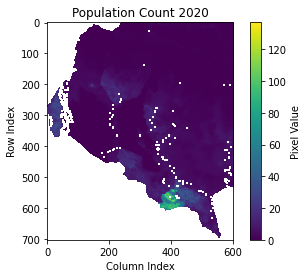

In [13]:
import rasterio
import matplotlib.pyplot as plt

# Load the raster data
raster_path = "data/raster/popCount_2020.tif"

with rasterio.open(raster_path) as src:
    raster_data = src.read(1)

    # Plot the raster using Matplotlib
    plt.imshow(raster_data, cmap='viridis')
    plt.colorbar(label="Pixel Value") 
    plt.title("Population Count 2020")
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")
    plt.show()

We can calculate basic summary statistics (mean, median, min, max) to get an overview of the population distribution across the region.

In [21]:
import numpy as np 

raster_file = "data/raster/popCount_2020.tif"
# open the raster file
with rasterio.open(raster_file) as src:

    # Read the raster data as a numpy array
    raster_data = src.read(1) # Single band raster

    # Mask invalid or nodata values 
    # Define a custom condition for masking (e.g., mask zeros)
    masked_data = np.ma.masked_where((raster_data == 0) | np.isnan(raster_data), raster_data)

    # Calculate summary statistics
    min_value = masked_data.min()
    max_value = masked_data.max()
    mean_value = masked_data.mean()
    median_value = np.ma.median(masked_data)

    # Print the results
    print(f"Minimum value: {min_value}")
    print(f"Maximum value: {max_value}")
    print(f"Mean value: {mean_value}")
    print(f"Median value: {median_value}")

Minimum value: 0.1460667997598648
Maximum value: 136.91754150390625
Mean value: 5.2824760935231385
Median value: 2.4147253036499023


### Identify High-Density Regions

You can extract specific regions of the raster where the population is above a certain threshold, which could be useful for identifying high-density areas.

In [38]:
import rasterio
import numpy as np

raster_file = "data/raster/popCount_2020.tif"

# Define the population density threshold
threshold = 100

with rasterio.open(raster_file) as src:
    raster_data = src.read(1)  # Read the first band
    transform = src.transform  # Get the affine transform

    # Mask invalid or nodata values 
    # Define a custom condition for masking (e.g., mask zeros)
    masked_data = np.ma.masked_where((raster_data == 0) | np.isnan(raster_data), raster_data)

    # Identify high-density cells
    high_density_mask = raster_data > threshold
    high_density_indices = np.argwhere(high_density_mask)

    # Convert indices to geographic coordinates
    coordinates_high_density = [
        rasterio.transform.xy(transform, row, col, offset="center")
        for row, col in high_density_indices
    ]

    num_high_density_cells = len(coordinates_high_density)
    print(f"Number of high-density cells: {num_high_density_cells}")
    print(f"Sample coordinates of high-density cells: {coordinates_high_density[:3]}") # Display first three coordinates


Number of high-density cells: 549
Sample coordinates of high-density cells: [(80.399999692985, 28.688333420150848), (80.39583302633488, 28.685833420161014), (80.3966663596649, 28.685833420161014)]


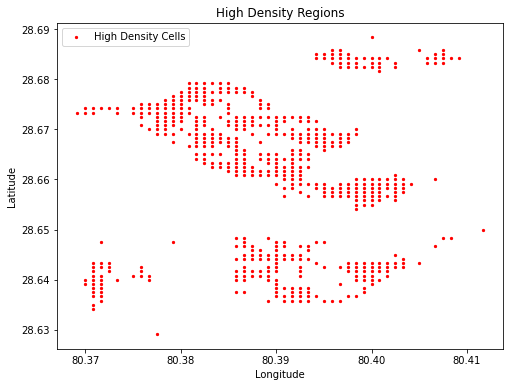

In [39]:
import matplotlib.pyplot as plt

# Coordinates of high-density cells (xyFromCell provides (x, y) coordinates)
x_coords, y_coords = zip(*coordinates_high_density)

# Plot the high-density points
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, c='red', s=5, label="High Density Cells")
plt.title("High Density Regions")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


- `x_coords, y_coords`: Unzips the coordinates_high_density to separate x and y values.
- `scatter`: Plots the high-density cells as red points on the plot.
- `s=5`: Sets the size of the points.

### Classify Raster Data

To classify raster data into categories (e.g., low, medium, high) in Python, you can use numpy's `cut` function for creating intervals.

In [54]:
import numpy as np
import pandas as pd
import rasterio

# Open the raster data
with rasterio.open("data/raster/popCount_2020.tif") as src:
    raster_data = src.read(1)  # Read the first band (assuming single-band raster)

# Reclassify the raster values into categories
breaks = [0, 1, 5, 20, 100, np.inf]  # Define the class boundaries
labels = ["Very Low", "Low", "Medium", "High", "Very High"]

# Use np.digitize to classify the raster values
classified_data = np.digitize(raster_data, bins=breaks, right=True)

# Handle the edge case where np.digitize assigns a value greater than the length of the labels
classified_data[classified_data == len(labels) + 1] = len(labels)  # Ensure index for 'Very High'

# Convert the numeric classification to labels
classified_labels = np.array(labels)[classified_data - 1]  # Adjust index for 0-based indexing

# Create a DataFrame with x, y coordinates and classification
rows, cols = np.indices(raster_data.shape)
df_classified = pd.DataFrame({
    'x': cols.flatten(),
    'y': rows.flatten(),
    'class': classified_labels.flatten()
})

# Show the first few rows of the classified DataFrame
print(df_classified.head())


   x  y      class
0  0  0  Very High
1  1  0  Very High
2  2  0  Very High
3  3  0  Very High
4  4  0  Very High


- `np.digitize`: Classifies the raster values based on predefined `breaks`. The function returns the indices of which class each value belongs to.
- `classified_labels`: Uses the indices from `np.digitize` to assign the corresponding labels from the `labels` list.
- `Creating DataFrame`: The coordinates of each raster cell `(x, y)` are flattened into arrays and combined with the classified labels to create a `DataFrame`.
- `right=True`: Ensures that the right boundary of each bin is included in the classification. For example, values exactly equal to 5 will be classified as "Low", rather than being excluded.
- `Edge Case Handling`: If np.digitize assigns an index greater than the size of labels (for values above the last bin), we correct it by explicitly setting those values to the last class ("Very High").
- `Adjustment for 0-based Indexing`: Since the labels array is 0-based, we subtract 1 from the classification indices to correctly match the class labels.

This code will provide the classified raster values as a DataFrame, which you can use for further analysis or visualization.

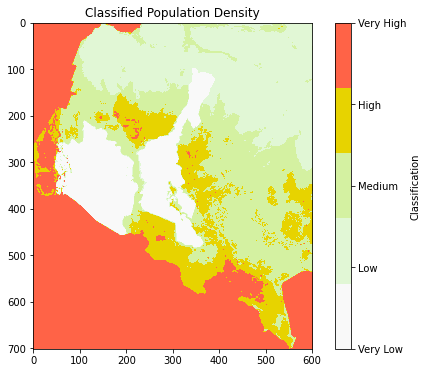

In [52]:
from matplotlib.colors import ListedColormap

# Create a plot to visualize the classified data
fig, ax = plt.subplots(figsize=(8, 6))

# Custom colors for the classes
cmap = ListedColormap(['#f9f9f9', '#e1f7d5', '#d4f1a1', '#e7d300', '#ff6347'])
bounds = [0, 1, 5, 20, 100, np.inf]
norm = plt.Normalize(vmin=0, vmax=len(labels)-1)

# Plot the classified raster data
cax = ax.imshow(classified_data, cmap=cmap, norm=norm)
ax.set_title("Classified Population Density")

# Add a colorbar with the class labels
colorbar = fig.colorbar(cax, ax=ax, ticks=np.arange(len(labels)))
colorbar.set_ticklabels(labels)
colorbar.set_label('Classification')

# Show the plot
plt.show()

*Note: Values outside of your Area of Interest (AOI) show as "Very High," likely occurs because the raster data outside the AOI is being treated as having the highest value by default. To solve this, you need to mask the raster to focus only on the AOI, ensuring that areas outside the AOI are not processed or classified.* 

### Change Identification

If you have multiple rasters representing population data over different time periods, you can compute the changes in population between two periods. Let’s load the Population Count raster data for years 2000 and 2020, so we can compute the changes in population over a 20-year period.

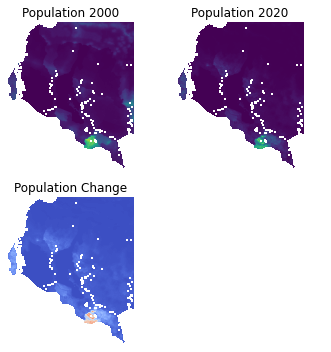

In [70]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load population count raster for the year 2000
r1 = rasterio.open("data/raster/popCount_2000.tif")

# Load population count raster for the year 2020
r2 = rasterio.open("data/raster/popCount_2020.tif")

# Read the population count data as arrays
pop_2000 = r1.read(1)
pop_2020 = r2.read(1)

# Population change between 2020 and 2000
population_change = pop_2020 - pop_2000

# Set up a plotting layout: 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

# Plot the raster using Matplotlib
axs[0, 0].imshow(pop_2000, cmap='viridis')
axs[0, 0].set_title("Population 2000")
axs[0, 0].axis('off')

# Plot the raster using Matplotlib
axs[0, 1].imshow(pop_2020, cmap='viridis')
axs[0, 1].set_title("Population 2020")
axs[0, 1].axis('off')

# Plot the raster using Matplotlib
axs[1, 0].imshow(population_change, cmap='coolwarm')
axs[1, 0].set_title("Population Change")
axs[1, 0].axis('off')

# Reset the layout for default (1 plot)
axs[1, 1].axis('off')  # Empty subplot as we have only 3 plots

plt.tight_layout()
plt.show()


- **Reading the Raster Files:**
-- The `rasterio.open()` function is used to open the raster files.
-- `r1.read(1)` and `r2.read(1)` read the first band (the population count data) of the raster files as arrays.

- **Population Change Calculation:**
-- The population change is calculated by subtracting the 2000 population values (`pop_2000`) from the 2020 population values (`pop_2020`).

- **Plotting:**
-- `matplotlib` is used to create the plots. We use `imshow` to display the rasters with the `viridis` colormap for population count and `coolwarm` for population change.
-- The layout is set with `plt.subplots()` to create 2 rows and 2 columns, similar to `par(mfrow = c(2, 2))` in R.
-- We turn off the axes with `axis('off')` for a cleaner plot.

**For this tutorial, this concludes the coverage of Data Frames in Python. If you would like to explore additional examples, or need clarification on any of the steps covered, please visit the GitHub repository: [Python_tutorial](https://github.com/Ohm-Np/Python_tutorial) and feel free to open an issue.**